<a href="https://colab.research.google.com/github/GJimenez6900/Aplicacionweb/blob/master/Taller9_Jomenez_Alarcon_Restrepo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller N9**
Estudiantes: Isaias Alarcon, Gloria Jimenez, Yulissa Restrepo\
Grupo: 1SF241

In [ ]:
from math import sqrt, pi, ceil, floor
import matplotlib
import matplotlib.patches
from matplotlib.collections import PatchCollection


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim

blue = 'C0'
black = 'k'
red = 'C3'
green = 'C2'
purple = 'C4'
orange = 'C2'
gray = 'gray'

class Polygon():
    def __init__(self, *vertices, color=blue, fill=None, alpha=0.4):
        self.vertices = vertices
        self.color = color
        self.fill = fill
        self.alpha = alpha

class Puntos():
    def __init__(self, *vectors, color=black):
        self.vectors = list(vectors)
        self.color = color

class Arrow():
    def __init__(self, tip, tail=(0,0), color=red):
        self.tip = tip
        self.tail = tail
        self.color = color

class Segment():
    def __init__(self, start_point, end_point, color=blue):
        self.start_point = start_point
        self.end_point = end_point
        self.color = color

# helper function to extract all the vectors from a list of objects
def extract_vectors(objects):
    for object in objects:
        if type(object) == Polygon:
            for v in object.vertices:
                yield v
        elif type(object) == Puntos:
            for v in object.vectors:
                yield v
        elif type(object) == Arrow:
            yield object.tip
            yield object.tail
        elif type(object) == Segment:
            yield object.start_point
            yield object.end_point
        else:
            raise TypeError("Unrecognized object: {}".format(object))

def draw(*objects, origin=True, axes=True, grid=(1,1), nice_aspect_ratio=True,
            width=6, save_as=None):

    all_vectors = list(extract_vectors(objects))
    xs, ys = zip(*all_vectors)

    max_x, max_y, min_x, min_y = max(0,*xs), max(0,*ys), min(0,*xs), min(0,*ys)

    #sizing
    if grid:
        x_padding = max(ceil(0.05*(max_x-min_x)), grid[0])
        y_padding = max(ceil(0.05*(max_y-min_y)), grid[1])

        def round_up_to_multiple(val,size):
            return floor((val + size) / size) * size

        def round_down_to_multiple(val,size):
            return -floor((-val - size) / size) * size

        plt.xlim(floor((min_x - x_padding) / grid[0]) * grid[0],
                ceil((max_x + x_padding) / grid[0]) * grid[0])
        plt.ylim(floor((min_y - y_padding) / grid[1]) * grid[1],
                ceil((max_y + y_padding) / grid[1]) * grid[1])

    if origin:
        plt.scatter([0],[0], color='k', marker='x')

    if grid:
        plt.gca().set_xticks(np.arange(plt.xlim()[0],plt.xlim()[1],grid[0]))
        plt.gca().set_yticks(np.arange(plt.ylim()[0],plt.ylim()[1],grid[1]))
        plt.grid(True)
        plt.gca().set_axisbelow(True)

    if axes:
        plt.gca().axhline(linewidth=2, color='k')
        plt.gca().axvline(linewidth=2, color='k')

    for object in objects:
        if type(object) == Polygon:
            for i in range(0,len(object.vertices)):
                x1, y1 = object.vertices[i]
                x2, y2 = object.vertices[(i+1)%len(object.vertices)]
                plt.plot([x1,x2],[y1,y2], color=object.color)
            if object.fill:
                xs = [v[0] for v in object.vertices]
                ys = [v[1] for v in object.vertices]
                plt.gca().fill(xs,ys,object.fill,alpha=object.alpha)
        elif type(object) == Puntos:
            xs = [v[0] for v in object.vectors]
            ys = [v[1] for v in object.vectors]
            plt.scatter(xs,ys,color=object.color)
        elif type(object) == Arrow:
            tip, tail = object.tip, object.tail
            tip_length = (xlim()[1] - xlim()[0]) / 20.
            length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
            new_length = length - tip_length
            new_y = (tip[1] - tail[1]) * (new_length / length)
            new_x = (tip[0] - tail[0]) * (new_length / length)
            plt.gca().arrow(tail[0], tail[1], new_x, new_y,
            head_width=tip_length/1.5, head_length=tip_length,
            fc=object.color, ec=object.color)
        elif type(object) == Segment:
            x1, y1 = object.start_point
            x2, y2 = object.end_point
            plt.plot([x1,x2],[y1,y2], color=object.color)
        else:
            raise TypeError("Unrecognized object: {}".format(object))

    fig = matplotlib.pyplot.gcf()

    if nice_aspect_ratio:
        coords_height = (ylim()[1] - ylim()[0])
        coords_width = (xlim()[1] - xlim()[0])
        fig.set_size_inches(width , width * coords_height / coords_width)

    if save_as:
        plt.savefig(save_as)

    plt.show()

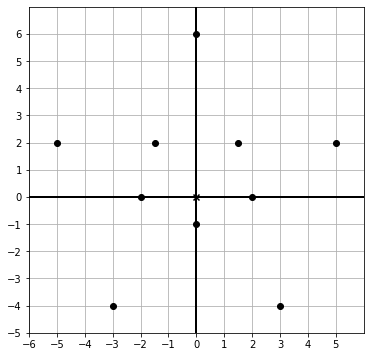

In [ ]:
vectores = [(0,6), (1.5,2), (5,2), (2,0), (3,-4), 
            (0,-1), (-3,-4), (-2,0), (-5,2), (-1.5,2)
]

draw(
    Puntos(*vectores)
)

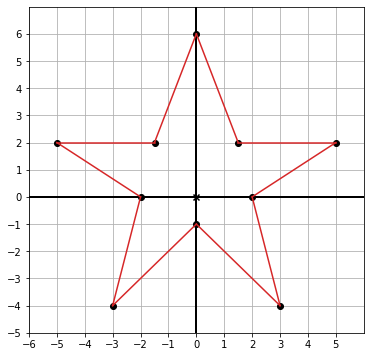

In [ ]:
draw(
    Puntos(*vectores),
    Polygon(*vectores, color= red)   
)

In [ ]:
vectores2 = [(1,2), (2,4), (3,6), (4,8)]

In [ ]:
#Suma de vectores
def add2(*vectors):
  xx = [x[0] for x in vectores2]
  x= sum(xx)
  yy = [x[1] for x in vectores2]
  y= sum(yy)
  return x,y

result = add2(*vectores)
result

(10, 20)

In [ ]:
#Trasladar vectores
def add3(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [ ]:
def trasladar(traslacion, vectores):
    return [add3((traslacion), v) for v in vectores]
vectoresT = trasladar((-5.5,-4.5), vectores)
vectoresT

[(-5.5, 1.5),
 (-4.0, -2.5),
 (-0.5, -2.5),
 (-3.5, -4.5),
 (-2.5, -8.5),
 (-5.5, -5.5),
 (-8.5, -8.5),
 (-7.5, -4.5),
 (-10.5, -2.5),
 (-7.0, -2.5)]

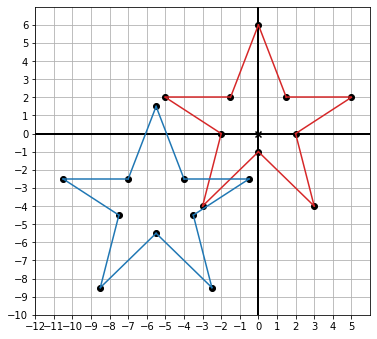

In [ ]:
draw(
    Puntos(*vectores),
    Polygon(*vectores, color= red),
    Puntos(*vectoresT),
    Polygon(*vectoresT, color= blue)   
)

In [ ]:
#Escalar vectores
from math import sqrt
def multi (a, b):
  return (a * b[0], a * b[1])

In [ ]:
def scale(scalar,v):
    return [multi((scalar), v) for v in vectores]
    ###w_scaled = (sqrt(v[0]), sqrt(v[1]))

In [ ]:
escalado = scale(2, vectores)
escalado

[(0, 12),
 (3.0, 4),
 (10, 4),
 (4, 0),
 (6, -8),
 (0, -2),
 (-6, -8),
 (-4, 0),
 (-10, 4),
 (-3.0, 4)]

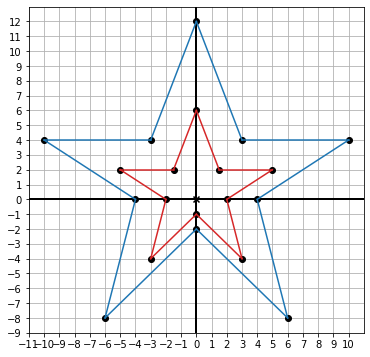

In [ ]:
draw(
    Puntos(*vectores),
    Polygon(*vectores, color= red),
    Puntos(*escalado),
    Polygon(*escalado, color= blue)
   
)